<a href="https://colab.research.google.com/github/mlgal24/ODM/blob/master/ndvifromnaipag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install rasterio
!pip install geopandas

     |████████████████████████████████| 19.7MB 5.5MB/s 


In [0]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import rasterio as rio
import geopandas as gpd

In [0]:
#from your local file

from google.colab import files
uploaded = files.upload()

In [0]:
#import data from google drive
#mount google drive, give colab access

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Check GDrive access:

!ls "/content/gdrive/My Drive/Colab Notebooks"

m_4108423_nw_16_1_20170718.ZIP


In [0]:
#Unzip (q - quite!) file from GDrive:
#dataset=m_4108423_ne_16_1_20170718

!unzip -q "/content/gdrive/My Drive/Colab Notebooks/Lenawee_MI/m_4108423_ne_16_1_20170718.ZIP"

replace m_4108423_ne_16_1_20170718.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace m_4108423_ne_16_1_20170718.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
#checking if the file is there

!ls "m_4108423_ne_16_1_20170718.tif"

m_4108423_ne_16_1_20170718.tif


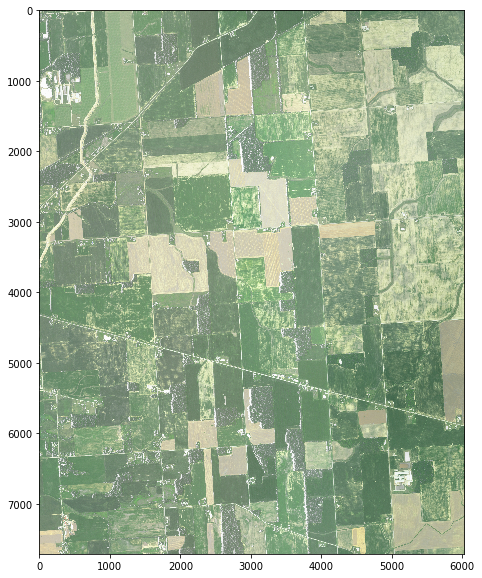

In [0]:
#open raster (.tif) file

with rio.open("m_4108423_ne_16_1_20170718.tif") as ras:
    naip_raster1 = ras.read()
    #naip_raster1 = ras.meta()

#view shape of the data

naip_raster1.shape

#visualize actual raster downloaded from naip

from rasterio.plot import show
fig= plt.subplots(figsize=(20,10))
show(naip_raster1)

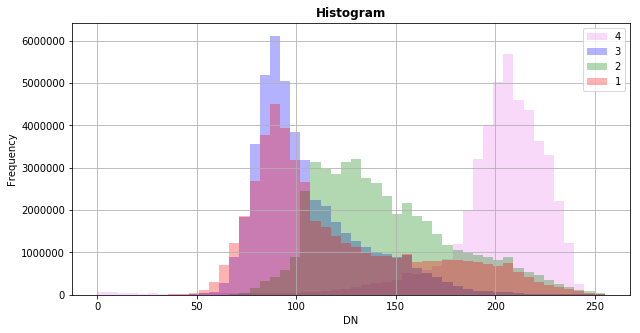

In [0]:
#plot histogram of raster data

from rasterio.plot import show_hist

fig= plt.subplots(figsize=(10,5))
show_hist(naip_raster1, bins=50, lw=1.0, stacked=False, alpha=0.3,
   histtype='stepfilled', title="Histogram")

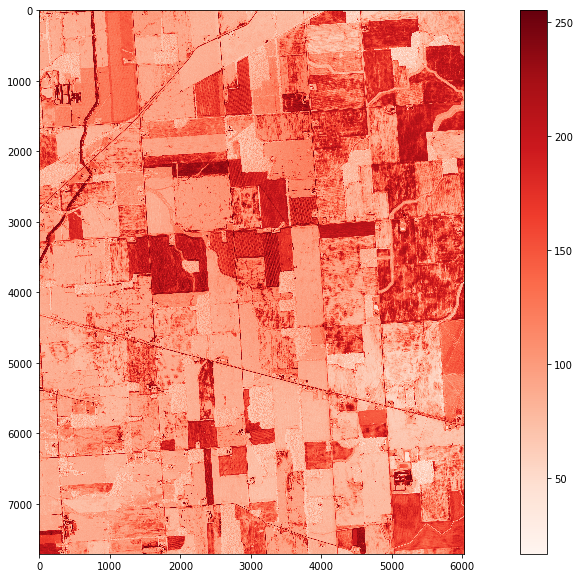

In [0]:
#red band

r=naip_raster1[0]
fig, ax = plt.subplots(figsize=(20,10))
fig=plt.imshow(r)
fig.set_cmap('Reds')
plt.colorbar()
plt.show()

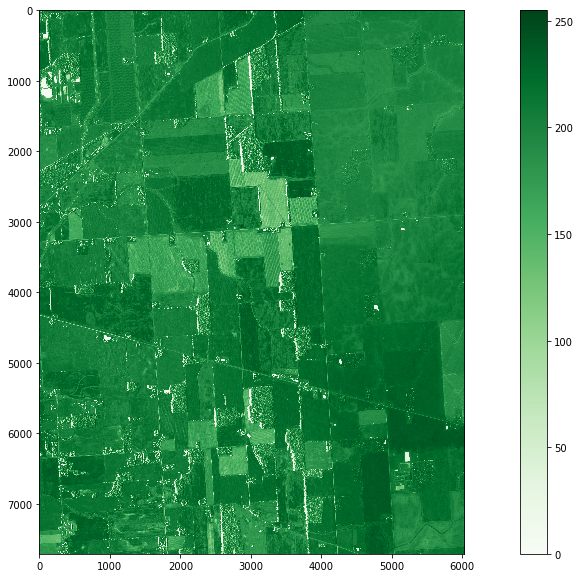

In [0]:
#nir band

nir=naip_raster1[3]
fig, ax = plt.subplots(figsize=(20,10))
fig=plt.imshow(nir)
fig.set_cmap('Greens')
plt.colorbar()
plt.show()

In [0]:
#NDVI calculation: (nir-r)/(nir+r)
ndvi_naip_lmi = (naip_raster1[3] - naip_raster1[0]) / (naip_raster1[3] + naip_raster1[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


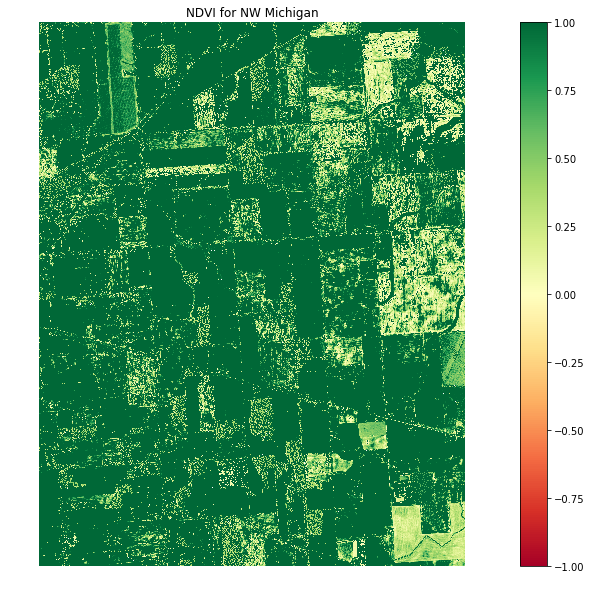

In [0]:
# Plot NDVI map
fig, ax = plt.subplots(figsize=(20,10))
ndvi_map = ax.imshow(ndvi_naip_lmi, cmap='RdYlGn',vmin=-1, vmax=1)
fig.colorbar(ndvi_map, fraction=.05)
ax.set(title="NDVI for NW Michigan")
ax.set_axis_off()
plt.show()